In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('C:\\Users\\win 10\\Desktop\\Anupriya Lokras - 0901CM191013\\heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<Axes: >

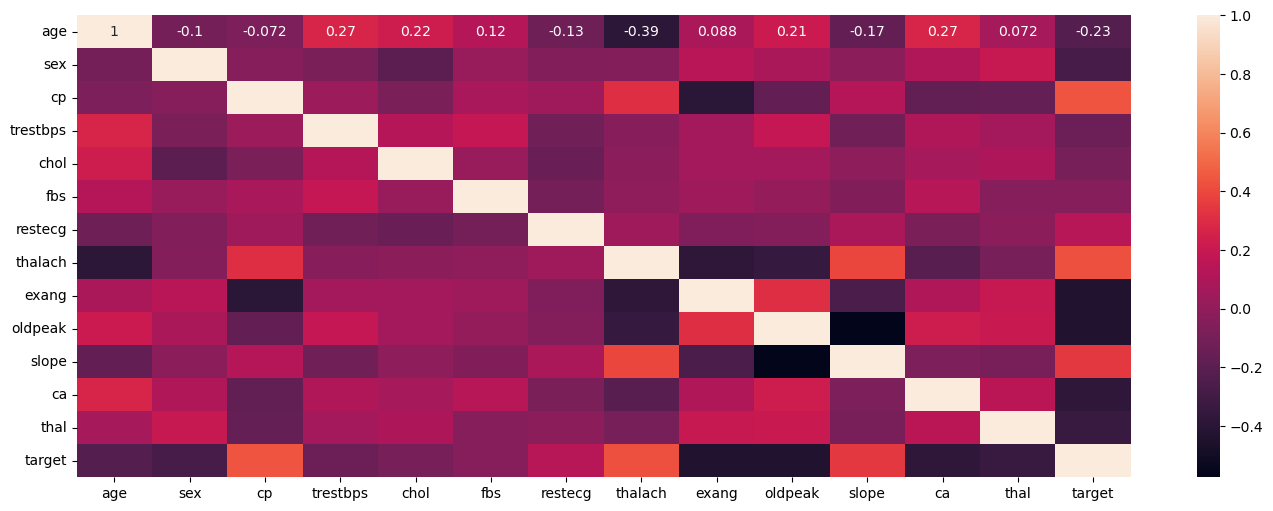

In [6]:
#draw correlation matrix
data.corr()
plt.figure(figsize=(17, 6))
sns.heatmap(data.corr(), annot = True)

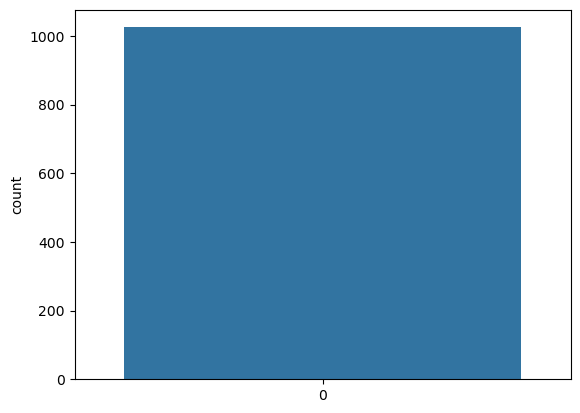

In [14]:
#how many people have heart disease and how many dont have heart disease in this dataset
data.columns
data['target'].value_counts()
sns.countplot(data['target'])
plt.show()

([<matplotlib.axis.XTick at 0x216782f6550>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

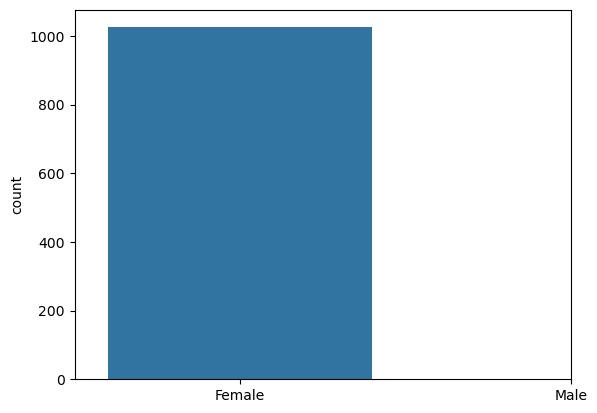

In [21]:
#find the count of male and female in this dataset
data.columns
data['sex'].value_counts()
sns.countplot(data['sex'])
plt.xticks([0,1], ['Female', 'Male'])

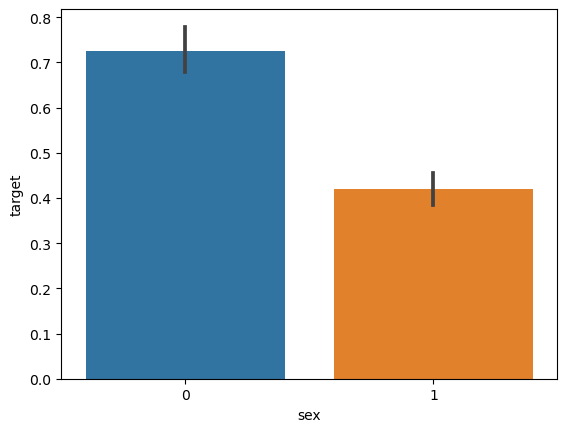

In [23]:
#find gender distribution according to the target variable
data.columns
sns.barplot(x = 'sex', y = 'target', data=data)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

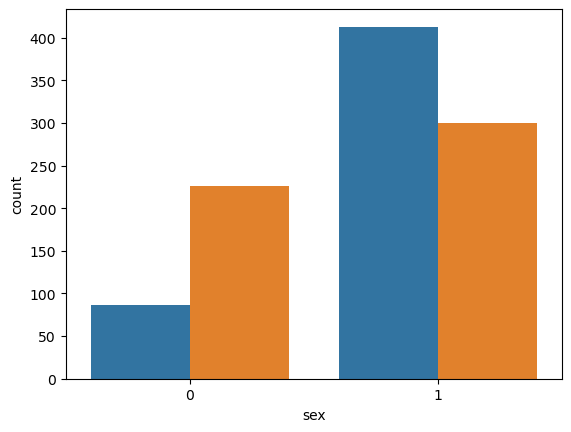

In [26]:
#we can also use countplot
sns.countplot(x = 'sex', hue="target", data=data)
plt.xticks([1, 0], ['Male', 'Female'])
plt.legend(labels=['No-Disease'])
plt.show()

C:\Users\win 10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win 10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

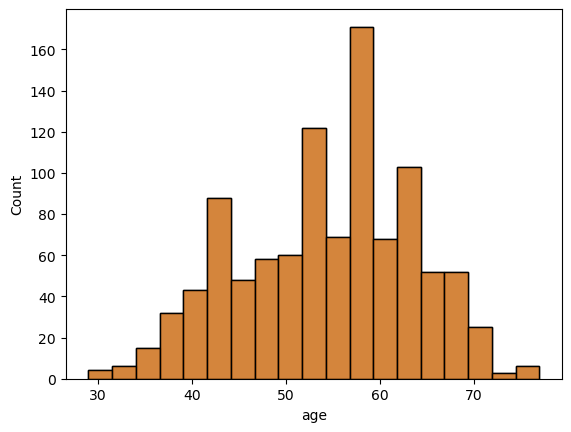

In [33]:
#check age distribution in the dataset
sns.histplot(data['age'])
# Convert infinite values to NaN
data['age'] = data['age'].replace([np.inf, -np.inf], np.nan)

# Create a histogram plot using sns.histplot
sns.histplot(data['age'])

In [28]:
data['age']

0       52
1       53
2       70
3       61
4       62
        ..
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64

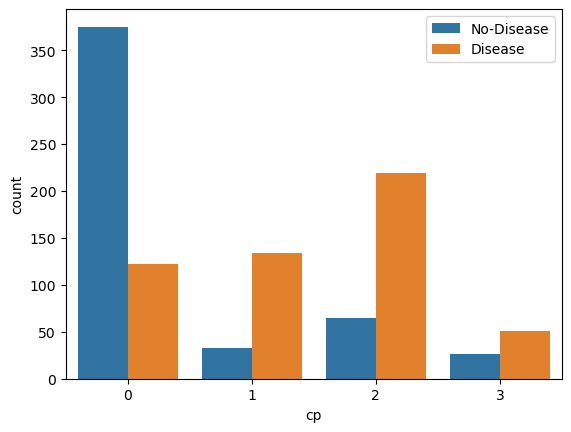

In [38]:
#show the chest pain distribution as per the target variable
data.columns
data['target'] = data['target'].astype(str)
sns.countplot(x="cp", hue="target", data=data)
plt.legend(labels=["No-Disease", "Disease"])
plt.show()

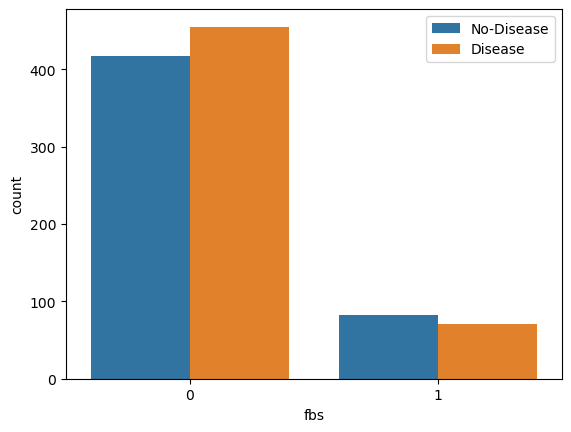

In [41]:
#show fasting blood sugar distribution according to the target variable
sns.countplot(x="fbs", hue="target", data=data)
plt.legend(labels=["No-Disease", "Disease"])
plt.show()

<Axes: >

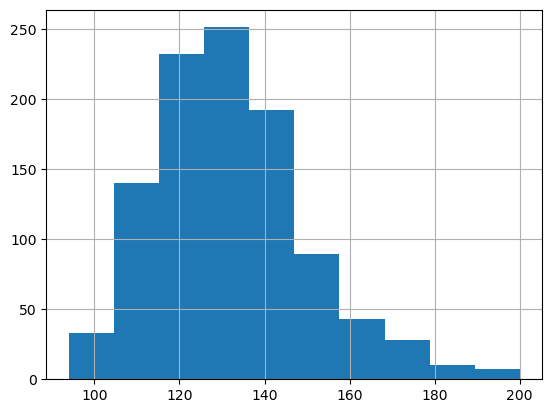

In [43]:
#check resting blood pressure distribution
data.columns
data['trestbps'].hist()

C:\Users\win 10\AppData\Local\Temp\ipykernel_7868\875514320.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win 10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win 10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


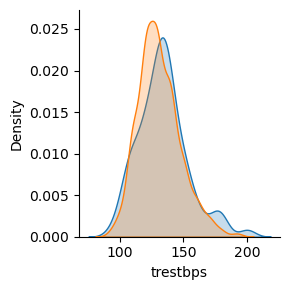

In [51]:
#compare resting blood pressure as per sex column
data['trestbps'] = pd.to_numeric(data['trestbps'], errors='coerce')
with pd.option_context('mode.use_inf_as_na', True):
    g = sns.FacetGrid(data, hue="sex")
    g.map(sns.kdeplot, 'trestbps', fill=True)

<Axes: >

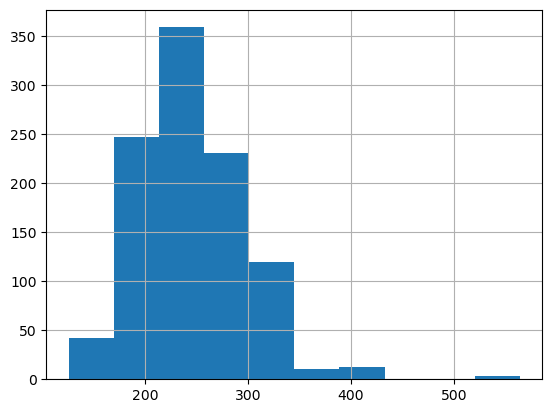

In [52]:
#show distribution of serum cholestrol
data['chol'].hist()

In [53]:
#plot continuous variable
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        

cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [54]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

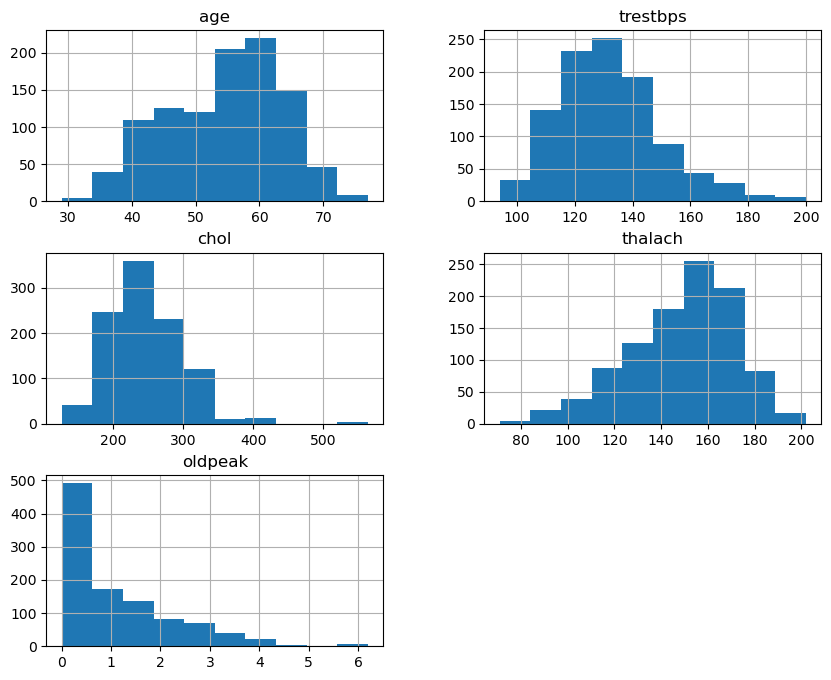

In [58]:

data.hist(cont_val, figsize=(10, 8))
plt.show()